#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Let's take a look at a sample of the images in the dataset:

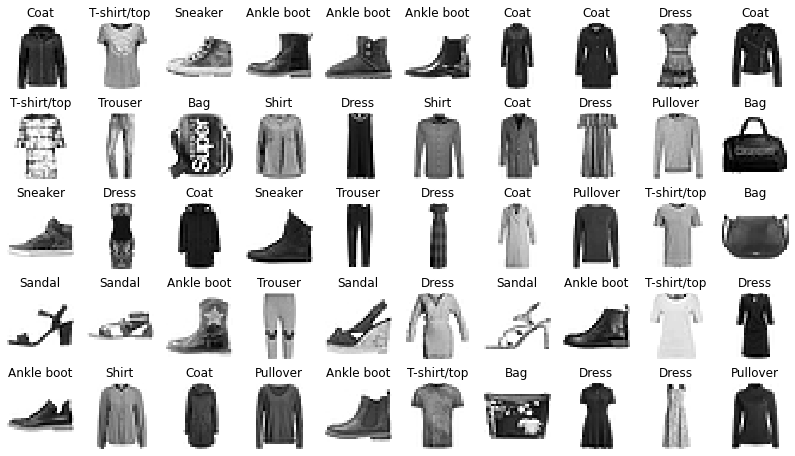

In [10]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [11]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)
X_train = (X_train - X_train_mean) / X_train_std   #[TO COMPLETE]
X_valid = (X_valid - X_train_mean) / X_train_std   #[TO COMPLETE]
X_test =  (X_test - X_train_mean) / X_train_std   #[TO COMPLETE]


#Add one dimension to manage the channel
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 2s 4ms/step - loss: 1.0905 - accuracy: 0.6683 - val_loss: 0.5547 - val_accuracy: 0.8086
Epoch 2/10
430/430 [==============================] - 2s 4ms/step - loss: 0.5208 - accuracy: 0.8212 - val_loss: 0.4605 - val_accuracy: 0.8456
Epoch 3/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4633 - accuracy: 0.8389 - val_loss: 0.4314 - val_accuracy: 0.8520
Epoch 4/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4294 - accuracy: 0.8492 - val_loss: 0.4122 - val_accuracy: 0.8592
Epoch 5/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3965 - accuracy: 0.8628 - val_loss: 0.3847 - val_accuracy: 0.8680
Epoch 6/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3816 - accuracy: 0.8682 - val_loss: 0.3670 - val_accuracy: 0.8764
Epoch 7/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3657 - accuracy: 0.8723 - val_loss: 0.3938 - val_accuracy: 0.8662
Epoch 

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 0s - loss: 0.3789 - accuracy: 0.8661
accuracy: 86.61%


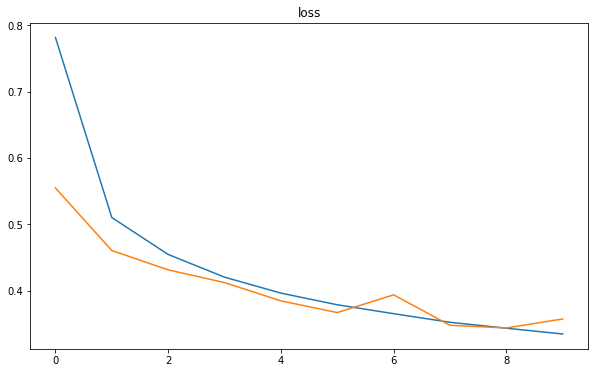

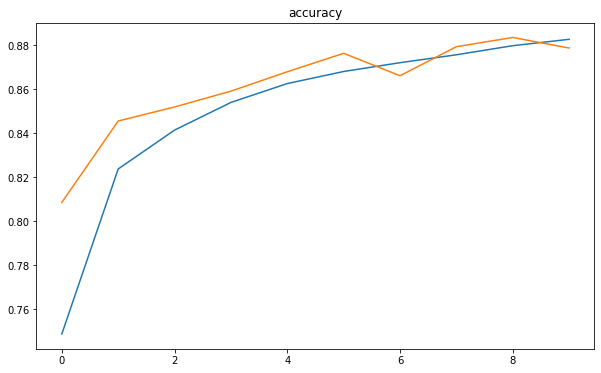

In [15]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

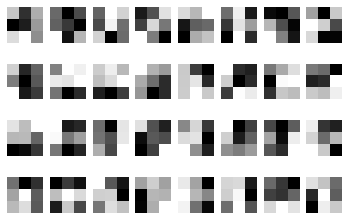

In [16]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
____________________________________________________

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   [TO COMPLETE] Answer to question 1

In the Conv2D layer we have a sparse weight matrix which means the weight matrix has many zeros, so we consider only the non-zero weights that is calculated below: 
param_number = output_channel_number * ((input_channel_number * kernel_height * kernel_width) + 1)
$param = output * ((input * kernelh* kernelw) + 1)$


In Layer conv2d_1, 
Because we have 32 filters, the image is grayscale (channel is 1)
output_channel_number = 32, 
input_channel_number = 1,
kernel_height = 3,
kernel_width = 3,

$32 * ((1 * 3 * 3) + 1) = 320 $

2.   [TO COMPLETE] Answer to question 2

In the second layer we have different number of parameters becasue we have 16 filters(output), a kernel of (2*2), and 32 inputs considering the bias the calculation is as follows:

$16 * ((32 * 2 * 2) + 1) = 2064 $


Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 2s 5ms/step - loss: 1.4925 - accuracy: 0.4746 - val_loss: 0.7803 - val_accuracy: 0.7172
Epoch 2/10
430/430 [==============================] - 2s 4ms/step - loss: 0.6712 - accuracy: 0.7596 - val_loss: 0.6308 - val_accuracy: 0.7506
Epoch 3/10
430/430 [==============================] - 2s 4ms/step - loss: 0.5677 - accuracy: 0.7972 - val_loss: 0.5259 - val_accuracy: 0.8172
Epoch 4/10
430/430 [==============================] - 2s 4ms/step - loss: 0.5130 - accuracy: 0.8179 - val_loss: 0.4642 - val_accuracy: 0.8382
Epoch 5/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4754 - accuracy: 0.8322 - val_loss: 0.4438 - val_accuracy: 0.8502
Epoch 6/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4496 - accuracy: 0.8416 - val_loss: 0.4322 - val_accuracy: 0.8494
Epoch 7/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4304 - accuracy: 0.8492 - val_loss: 0.4226 - val_accuracy: 0.8548
Epoch 

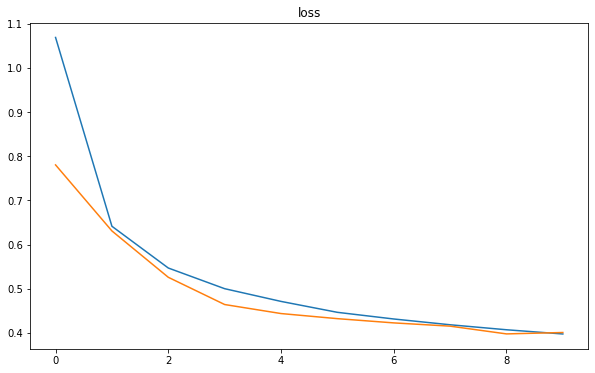

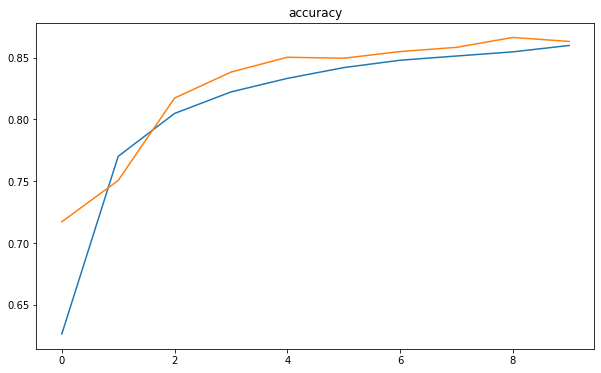

In [18]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [19]:
#[TO COMPLETE]
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
earlystopping = [EarlyStopping(patience=3)]
callbacks_list = [checkpoint, earlystopping]

model = keras.models.Sequential([
        keras.layers.Conv2D(filters=128, kernel_size=[2, 2], padding="same", activation="relu",
                            input_shape=[28, 28, 1]),
        keras.layers.MaxPool2D(pool_size=[2, 2]),
        keras.layers.Conv2D(filters=128, kernel_size=[2, 2], activation='relu', padding='same'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, batch_size=256,
                  validation_data=(X_valid, y_valid), callbacks=callbacks_list)
model.load_weights('weights.hdf5')
scores = model.evaluate(X_test, y_test, verbose=2)


Epoch 1/50
215/215 [==============================] - 5s 20ms/step - loss: 0.7901 - accuracy: 0.7273 - val_loss: 0.3592 - val_accuracy: 0.8752
Epoch 2/50
215/215 [==============================] - 4s 19ms/step - loss: 0.3387 - accuracy: 0.8794 - val_loss: 0.3287 - val_accuracy: 0.8858
Epoch 3/50
215/215 [==============================] - 4s 19ms/step - loss: 0.2904 - accuracy: 0.8971 - val_loss: 0.2848 - val_accuracy: 0.8998
Epoch 4/50
215/215 [==============================] - 4s 19ms/step - loss: 0.2627 - accuracy: 0.9062 - val_loss: 0.2673 - val_accuracy: 0.9044
Epoch 5/50
215/215 [==============================] - 4s 19ms/step - loss: 0.2441 - accuracy: 0.9117 - val_loss: 0.2695 - val_accuracy: 0.9040
Epoch 6/50
215/215 [==============================] - 4s 19ms/step - loss: 0.2297 - accuracy: 0.9160 - val_loss: 0.2432 - val_accuracy: 0.9154
Epoch 7/50
215/215 [==============================] - 4s 19ms/step - loss: 0.2143 - accuracy: 0.9238 - val_loss: 0.2381 - val_accuracy: 0.9144

### [TO COMPLETE] Example of tests discussion
The best model that I found ...[TO COMPLETE]

The achieved accuracy in the test set is ...[TO COMPLETE]

Discussion:
[TO COMPLETE]

The best model that I found has two convolutions with a pooling layer succeeding each layer. I also added zero-padding for the convolution layer seems to enhance the accuracy. In compile step, I opted for Adam optimizer. Finally, in the training step, I added a model checkpoint and early stopping to avoid the extra computational cost and saving the best model considering validation loss.
 
The achieved accuracy in the test set is around 92 % 
 
Besides, I experimented on other models: 

Firstly, optimizers by using a for loop between 5 different optimizers,  I found that Adam optimizer is the best choice considering the original deep CNN given to us.

Number of Layers, I deleted the pooling layer to see that accuracy decreases when removing it probably because of a high number of parameters. I also added convolutional layers with pooling layers which performed exactly like one layer convolution CNN, so I deleted extra layers to preserve a less complex model.

Secondly, I ran an exhaustive grid search on all hyperparameters listed below.
Hyperparameters, I experimented on a different number of units(filters) and learning rates using a nested for loop. Kernel size and pool size were other parameters that I checked for best accuracy. 
 In general, big learning rates required a low number of epochs where smaller ones required more.
Batch_sizes, a smaller number of batch-size makes every epoch more computationally heavy.



In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 128)       640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                62730     
Total params: 129,034
Trainable params: 129,034
Non-trainable params: 0
________________________________________________